In [10]:
# Compute the total number of deaths caused by earthquakes since 2150 B.C. in each 
#country, and then print the top ten countries along with the total number of deaths.
import pandas as pd
import numpy as np 



In [11]:
my_data = pd.read_csv('Sig_Eqs.tsv','\t')

In [12]:
#1.1
df0= my_data.groupby(['Country']).sum().sort_values(['Deaths'],ascending=False)['Deaths'].head(10)
df0

Country
CHINA         2074900.0
TURKEY        1074769.0
IRAN          1011437.0
SYRIA          439224.0
ITALY          434863.0
HAITI          323472.0
AZERBAIJAN     317219.0
JAPAN          278138.0
ARMENIA        191890.0
PAKISTAN       148764.0
Name: Deaths, dtype: float64

<AxesSubplot:xlabel='Year'>

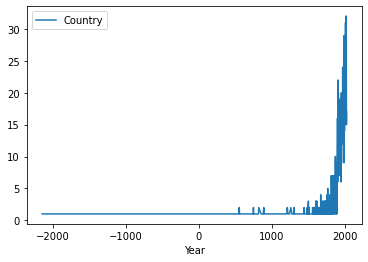

In [15]:
#1.2 得到的结果是:地震的总数逐年呈上升趋势，是因为地球南北两极的冰雪融化导致地北两极的质量分布在大规模的减少,进而导致地壳在被地下的岩浆所推动,增加了板块运动。
df1=my_data.loc[my_data['Mag']>6].groupby(['Year']).count()
df1.loc[:,['Country']].plot()

#.set(gac,'XTick',[-2200:500:2200])


In [30]:
#1.3
df2 = my_data.loc[:,['Country','Mag','Year','Mo','Dy']]
country_list = df2['Country'].unique()

df2['cYear'] = df2['Year'].astype(str)
df2['cMo'] = df2['Mo'].astype(str)
df2['cDy'] = df2['Dy'].astype(str)

df2['cMo'][df2['Mo'] < 10] = '0' + df2['cMo'].astype(str)
df2['cDy'][df2['Dy'] < 10] = '0' + df2['cDy'].astype(str)

df2['DATE'] = df2['cYear'] + '/' + df2['cMo'] + '/' + df2['cDy']

re=pd.DataFrame(columns=['Country','Mag','DATE'])

def CountEq_LargestEq(i):
    df3 = df2[df2['Country'] == str(i)]
    df4 = df3[df3['Mag']==df3['Mag'].max()][['Country','Mag','DATE']] 
    df4['total_number'] = df2[df2['Country'] == str(i)]['Country'].count()
    global re
    re = re.append(df4)
    
for k in country_list:
    CountEq_LargestEq(k)
    
re = re.sort_values('total_number',ascending=False,ignore_index=True)

re

<ipython-input-30-32b3bce87d88>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cMo'][df2['Mo'] < 10] = '0' + df2['cMo'].astype(str)
<ipython-input-30-32b3bce87d88>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cDy'][df2['Dy'] < 10] = '0' + df2['cDy'].astype(str)


Country  Mag              DATE  total_number
0               CHINA  8.5  1668.0/07.0/25.0         610.0
1               JAPAN  9.1  2011.0/03.0/11.0         409.0
2           INDONESIA  9.1  2004.0/12.0/26.0         399.0
3                IRAN  7.9   856.0/12.0/22.0         380.0
4              TURKEY  7.8  1912.0/08.0/09.0         330.0
..                ...  ...               ...           ...
162             PALAU  7.6  1914.0/10.0/23.0           1.0
163            NORWAY  5.8  1819.0/08.0/31.0           1.0
164  FRENCH POLYNESIA  6.5  1848.0/07.0/12.0           1.0
165          KIRIBATI  7.6  1905.0/06.0/30.0           1.0
166           COMOROS  5.9  2018.0/05.0/15.0           1.0

[167 rows x 4 columns]